In [1]:
!pip install requests pillow

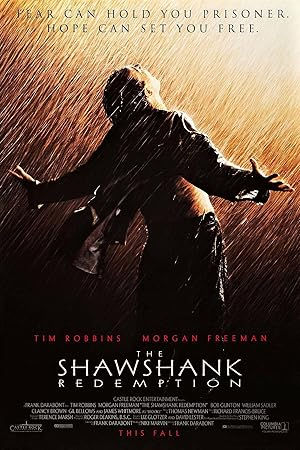

In [8]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

API_KEY = "86760ae5"

def get_movie_poster(imdb_id, api_key):
    """
    Fetches the movie poster image for a given IMDb ID using the OMDb API.

    Parameters:
    imdb_id (str): The IMDb ID of the movie (e.g., 'tt0111161').
    api_key (str): Your OMDb API key.

    Returns:
    Image object: The movie poster image.
    """
    # OMDb API endpoint
    url = f'http://www.omdbapi.com/?i={imdb_id}&apikey={api_key}'

    # Send a GET request to the OMDb API
    response = requests.get(url)
    data = response.json()

    # Check if the response contains a poster URL
    if 'Poster' in data and data['Poster'] != 'N/A':
        poster_url = data['Poster']
        # Fetch the poster image
        poster_response = requests.get(poster_url)
        poster_image = Image.open(BytesIO(poster_response.content))
        return poster_image
    else:
        print('Poster not found for this IMDb ID.')
        return None

poster = get_movie_poster('tt0111161', API_KEY)
if poster:
  display(poster)
else:
  print('Poster not found.')